In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import confusion_matrix




In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print ("shape of x_train",x_train.shape)
print ("shape of y_train",y_train.shape)
print ("shape of x_test",x_test.shape)
print ("shape of y_test",y_test.shape)

shape of x_train (60000, 28, 28)
shape of y_train (60000,)
shape of x_test (10000, 28, 28)
shape of y_test (10000,)


5


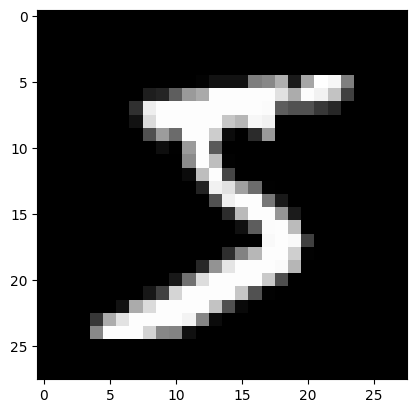

In [ ]:
plt.imshow(x_train[0], cmap='gray')
print(y_train[0])

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

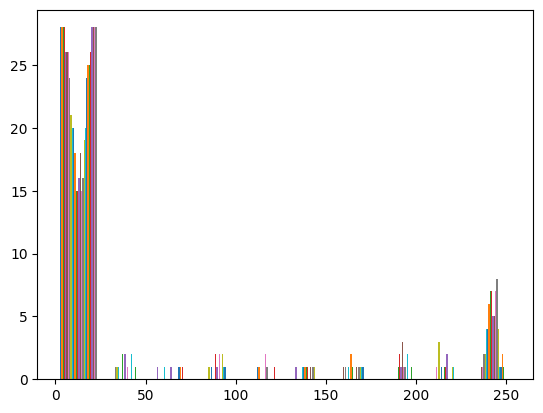

In [ ]:
# the complex of data
plt.hist(x_train[0])

In [ ]:
x_train_r= x_train.reshape(60000,784)
x_test_r= x_test.reshape(10000,784)


In [ ]:
# normalization
x_train_n= x_train_r.astype('float32')/255
x_test_n= x_test_r.astype('float32')/255


In [ ]:

model = Sequential()
model.add(Dense(50, activation='sigmoid', input_shape=(784,)))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])  # to fit the input with output


In [ ]:

loss, accuracy = model.evaluate(x_test_n, y_test)
print(f"Test accuracy: {accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1052 - loss: 2.4170
Test accuracy: 0.10320000350475311


In [ ]:


class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEnd of epoch {epoch}. Logs: {logs}")

history=model.fit(x_train_n, y_train, epochs=10, callbacks=[CustomCallback()])


Epoch 1/10
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9871 - loss: 0.0445
End of epoch 0. Logs: {'accuracy': 0.9863666892051697, 'loss': 0.04729039594531059}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9871 - loss: 0.0445
Epoch 2/10
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9891 - loss: 0.0387
End of epoch 1. Logs: {'accuracy': 0.9878666400909424, 'loss': 0.042406000196933746}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9891 - loss: 0.0387
Epoch 3/10
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9899 - loss: 0.0357
End of epoch 2. Logs: {'accuracy': 0.9895333051681519, 'loss': 0.03734932839870453}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9899 - loss: 0.0357
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9917 - loss: 0.0326
End of epoch 3. Logs: {'accuracy': 0.9905166625976562, 'loss': 0.03396552428603172}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9917 - loss: 0.0326
Epo

In [ ]:
y_pred=model.predict(x_test_n)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
cm = confusion_matrix(y_test, y_pred_classes)
cm

array([[ 969,    0,    2,    2,    2,    3,    1,    1,    0,    0],
       [   0, 1127,    1,    1,    0,    1,    2,    2,    1,    0],
       [   5,    4,  999,    8,    3,    0,    1,    6,    5,    1],
       [   1,    0,    7,  991,    0,    3,    0,    4,    3,    1],
       [   0,    0,    5,    1,  962,    1,    1,    2,    0,   10],
       [   5,    0,    0,   23,    2,  848,    6,    0,    5,    3],
       [   6,    3,    3,    1,    8,   11,  922,    0,    4,    0],
       [   1,    6,    8,   11,    2,    0,    0,  988,    1,   11],
       [   4,    2,    2,   15,    5,    4,    3,    5,  933,    1],
       [   3,    5,    0,   12,   14,    4,    0,    5,    2,  964]])

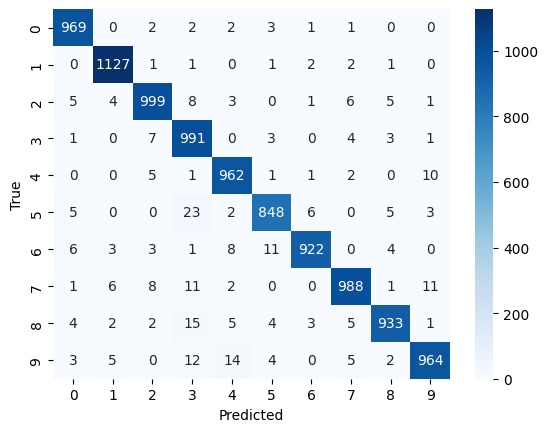

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()